In [2]:
import pandas
import seaborn
import numpy

# Scalability benchmark results

The SCIP tool ([commit](https://github.com/ScalableImagingPipeline/dask-pipeline/commit/db5adcd96ad4128e2dbba793676a0bc45ab00b18)) was ran on the Prism cluster on a Vulcan PBMC dataset of 1000 4-channel images. The amount of Dask worker processes was varied from 2 to 16, doubling the number of processes each time. Each measurement was repeated 3 times. Only one cluster node was used, which has 250GB of memory and 24 cores.

In [3]:
df = pandas.read_csv("../benchmark_results/0bd21bb93eb5661fca943748eca46723aae5f81a.csv")

In [4]:
df = pandas.read_csv("../benchmark_results/db5adcd96ad4128e2dbba793676a0bc45ab00b18.csv")

In [5]:
df = pandas.read_csv("../benchmark_results/b41cfad2a105d8e3655704e6cdbb418784465eda.csv")

In [6]:
df.shape

(6, 18)

In [7]:
df.head()

,n_workers,n_threads,local,n_cores,memory,walltime,job_extra,headless,timing,partition_size,local_directory,output,config,paths,port,debug,n_nodes,runtime
0,8,2,False,28,64,00:45:00,['-A lt1_starter-245'],True,/vsc-mounts/gent-user/420/vsc42015/projects/da...,10,/local_scratch/,/vsc-mounts/gent-user/420/vsc42015/projects/da...,scip.yml,['/data/gent/vo/000/gvo00070/vsc42015/datasets...,NaN,False,1,1502.437177
1,16,1,False,28,64,00:45:00,['-A lt1_starter-245'],True,/vsc-mounts/gent-user/420/vsc42015/projects/da...,10,/local_scratch/,/vsc-mounts/gent-user/420/vsc42015/projects/da...,scip.yml,['/data/gent/vo/000/gvo00070/vsc42015/datasets...,NaN,False,1,676.593552
2,8,2,False,28,64,00:45:00,['-A lt1_starter-245'],True,/vsc-mounts/gent-user/420/vsc42015/projects/da...,10,/local_scratch/,/vsc-mounts/gent-user/420/vsc42015/projects/da...,scip.yml,['/data/gent/vo/000/gvo00070/vsc42015/datasets...,NaN,False,1,1447.967548
3,8,2,False,28,64,00:45:00,['-A lt1_starter-245'],True,/vsc-mounts/gent-user/420/vsc42015/projects/da...,10,/local_scratch/,/vsc-mounts/gent-user/420/vsc42015/projects/da...,scip.yml,['/data/gent/vo/000/gvo00070/vsc42015/datasets...,NaN,False,1,1498.980985
4,16,1,False,28,64,00:45:00,['-A lt1_starter-245'],True,/vsc-mounts/gent-user/420/vsc42015/projects/da...,10,/local_scratch/,/vsc-mounts/gent-user/420/vsc42015/projects/da...,scip.yml,['/data/gent/vo/000/gvo00070/vsc42015/datasets...,NaN,False,1,710.540564


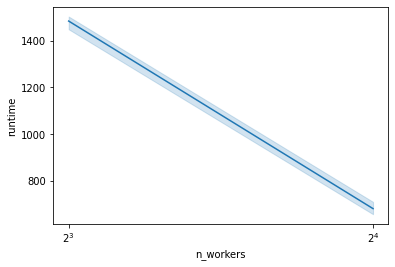

In [10]:
ax = seaborn.lineplot(data=df, x="n_workers", y="runtime", markers=True) 

baseline = df[df["n_workers"] == 2]["runtime"].mean()
ax.plot((2, 16), (baseline, baseline/8), linestyle="--")
ax.set_xscale("log", basex=2)